In [ ]:
import os
import sys
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler, Subset
from torchvision import transforms
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import datasets

%matplotlib inline

In [ ]:
import utils

In [ ]:
dataset = getattr(datasets, "BrainMRIDataset")(
    root_dir="../data/brain_MRI_Buda/kaggle_3m",
    image_size=tuple([256, 256]),
    transform=None,
)

# Create data loaders
train_loader, val_loader, _ = datasets.create_split_loaders(
    dataset=dataset,
    batch_size=4
)


In [49]:
images, masks = next(iter(train_loader))
images.shape, masks.shape

(torch.Size([4, 3, 256, 256]), torch.Size([4, 1, 256, 256]))

In [50]:
images[0].shape, masks[0].shape

(torch.Size([3, 256, 256]), torch.Size([1, 256, 256]))

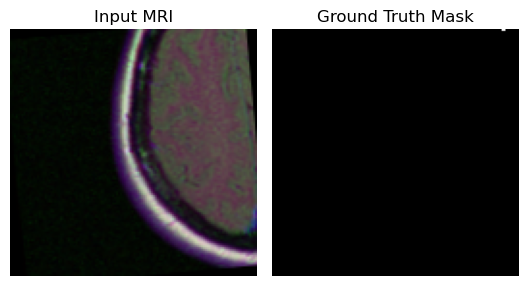

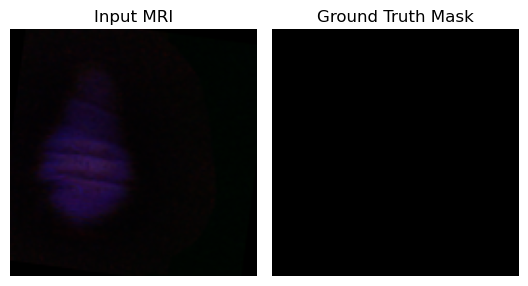

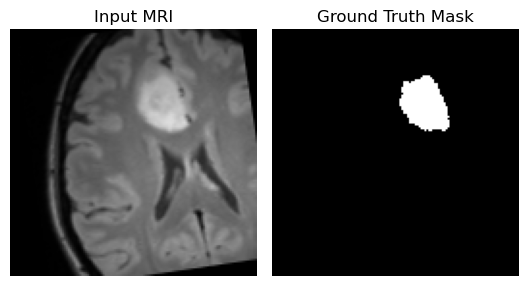

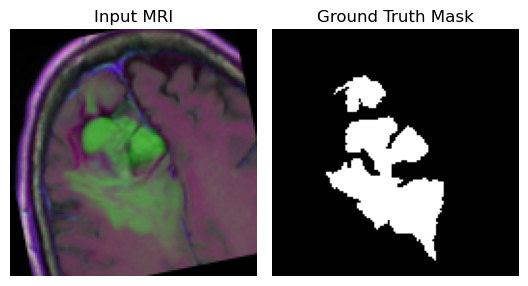

In [ ]:
# get one batch
images = (images - images.min()) / (images.max() - images.min())
masks = masks * 255
augs = ["random_crop", "random_rotation", "random_rotation", "random_crop"]

# plot image and mask
import matplotlib.pyplot as plt

for i in range(4):
    img = images[i]
    mask = masks[i]
    img, mask = getattr(datasets, augs[0])(img, mask)
    img, mask = getattr(datasets, augs[1])(img, mask, degree)


    plt.figure(figsize=(8, 4))
                    
    plt.subplot(1, 3, 1)
    plt.imshow(img.permute(1, 2, 0))
    plt.title("Input MRI")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title(f"Ground Truth Mask")
    plt.axis('off')

    plt.tight_layout()
    plt.show()